In [1]:
import astropy
import numpy as np
import pandas as pd

## Section1 : Parameters of the simulation: cosmology, box size, geometry, origin of lightcone etc 

In [2]:
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

## Box Size (in Mpc)
BoxLength = 2800. 

#ORIGIN OF THE LIGHTCONE
origin = [BoxLength/4,BoxLength/4,BoxLength/4]


In [3]:
## maximium redshift that can be probed with this config z = 7.6
box_info = {}
count = 1
coord_order = [0, -1, 1, -2, 2,-3]
for x in coord_order:
    for y in coord_order:
        for z in coord_order:
            box_info[f"Box{count}"] = [BoxLength * x, BoxLength * y, BoxLength * z]
            count += 1

In [4]:
box_info.keys()

dict_keys(['Box1', 'Box2', 'Box3', 'Box4', 'Box5', 'Box6', 'Box7', 'Box8', 'Box9', 'Box10', 'Box11', 'Box12', 'Box13', 'Box14', 'Box15', 'Box16', 'Box17', 'Box18', 'Box19', 'Box20', 'Box21', 'Box22', 'Box23', 'Box24', 'Box25', 'Box26', 'Box27', 'Box28', 'Box29', 'Box30', 'Box31', 'Box32', 'Box33', 'Box34', 'Box35', 'Box36', 'Box37', 'Box38', 'Box39', 'Box40', 'Box41', 'Box42', 'Box43', 'Box44', 'Box45', 'Box46', 'Box47', 'Box48', 'Box49', 'Box50', 'Box51', 'Box52', 'Box53', 'Box54', 'Box55', 'Box56', 'Box57', 'Box58', 'Box59', 'Box60', 'Box61', 'Box62', 'Box63', 'Box64', 'Box65', 'Box66', 'Box67', 'Box68', 'Box69', 'Box70', 'Box71', 'Box72', 'Box73', 'Box74', 'Box75', 'Box76', 'Box77', 'Box78', 'Box79', 'Box80', 'Box81', 'Box82', 'Box83', 'Box84', 'Box85', 'Box86', 'Box87', 'Box88', 'Box89', 'Box90', 'Box91', 'Box92', 'Box93', 'Box94', 'Box95', 'Box96', 'Box97', 'Box98', 'Box99', 'Box100', 'Box101', 'Box102', 'Box103', 'Box104', 'Box105', 'Box106', 'Box107', 'Box108', 'Box109', 'Box110

In [5]:
## Fullsky: True or False
FullSky = True

#DIRECTION VECTOR OF THE LIGHTCONE
if not FullSky:
    ra = np.radians(31) 
    piby2_minus_dec  = np.radians(80)  ## 80 is the theta in spherical coordinates
    direction_vector=[np.cos(ra)*np.sin(piby2_minus_dec),np.sin(ra)*np.sin(piby2_minus_dec),np.cos(piby2_minus_dec)]

#COSMOLOGY
om = 0.304611 ### cosmology of flaminggo D3A
ol = 0.693922
H = 68.1 * u.km / u.s / u.Mpc
h = H.value/100

m_nu = [0.0,0.02,0.04] *u.eV
cosmo = FlatLambdaCDM(H0=H, Om0=om, Ob0=0.049, Tcmb0=2.725)
redshift_file='/nfs/pic.es/user/s/sramakri/Flamingo/flamingo_params.txt'
df=pd.read_csv(redshift_file,usecols=[0,2],names=['snap','z'],skiprows=1,delimiter=' ')
redshift = {str(snap): [z] for snap, z in zip(df.sort_values('snap', ascending=False)['snap'], df.sort_values('snap', ascending=False)['z'])}

#redshift = {"144":[0],"143":[0.009522],'142':[0.019134],'141':[0.028838]}

for i, label in enumerate(redshift.keys()):
    redshift[label].append(cosmo.comoving_distance(redshift[label][0]).value)
comov_dist = np.zeros([len(redshift)])
redshift_array = np.zeros([len(redshift)])
for i,snapshot in enumerate(redshift):
    comov_dist[i] = cosmo.comoving_distance(redshift[snapshot][0]).value
    redshift_array[i] = redshift[snapshot][0]

comov_dist_mid = np.pad((comov_dist[1:]+comov_dist[0:-1])/2,(1,1))
comov_dist_mid[-1] = comov_dist[-1]

#BUFFER REGION
buffer_comovD = 1/h   ## approx 1/h Mpc assuming haloes don't go farther than this between snapshots, obtained from the rough estimate in Section 1

print (redshift,comov_dist_mid,len(redshift))

{'144': [0.0, 0.0], '143': [0.009522, 41.826713470251796], '142': [0.019134, 83.86264064982566], '141': [0.028838, 126.11015663129425], '140': [0.038634, 168.56277531881085], '139': [0.048524, 211.2225640148051], '138': [0.05, 217.57187177503067], '137': [0.058507, 254.07852770994853], '136': [0.068586, 297.13675281026264], '135': [0.078761, 340.3903067486082], '134': [0.089032, 383.83221308728224], '133': [0.099402, 427.46804683875337], '132': [0.1, 429.9774611816535], '131': [0.10987, 471.2863833627282], '130': [0.120438, 515.2883097052181], '129': [0.131106, 559.4664431546292], '128': [0.141876, 603.8215876501212], '127': [0.152749, 648.3502557249908], '126': [0.163725, 693.0447856293879], '125': [0.174805, 737.901535751655], '124': [0.185992, 782.9247828205471], '123': [0.197284, 828.0985638850425], '122': [0.2, 838.923152327746], '121': [0.208684, 873.4269254679826], '120': [0.220193, 918.9057419024422], '119': [0.237662, 987.3926645608075], '118': [0.261343, 1079.1880596566828], 

## Section 2: Approximate buffer region estimate

In [6]:
lookback_time = np.zeros([len(redshift)])
for i,snapshot in enumerate(redshift):
    lookback_time[i] = cosmo.lookback_time(redshift[snapshot][0]).value
delta_t = lookback_time[1:]-lookback_time[:-1]
oneGigaYear_to_sec = 3.15e16  ## seconds
km_to_Mpc = 3.24078e-20 
rough_estimate_of_how_much_haloes_move_in_Mpc = (delta_t)*oneGigaYear_to_sec*350*km_to_Mpc  ### 300 km/s approximate the average velocity dispersion of the local universe
print (delta_t,rough_estimate_of_how_much_haloes_move_in_Mpc.max())

[0.13577556 0.13516768 0.13456678 0.13394471 0.13332884 0.01973642
 0.11294225 0.13204758 0.13139547 0.13072298 0.13006808 0.00744258
 0.12193756 0.12869682 0.1279935  0.12729432 0.12658698 0.12586009
 0.12512555 0.12440543 0.12364407 0.02945426 0.09344278 0.12214196
 0.18176887 0.23962473 0.23646635 0.13863514 0.09460423 0.22997454
 0.22666349 0.2232998  0.21991139 0.21647508 0.21301775 0.20951853
 0.02966121 0.17635614 0.20247979 0.19893057 0.19537189 0.19180617
 0.18823016 0.1382274  0.04643705 0.18109389 0.17753802 0.17398823
 0.17045735 0.16693775 0.1634505  0.15997455 0.15653849 0.0495884
 0.10353404 0.14974853 0.14640223 0.14309652 0.13982873 0.13660336
 0.13342422 0.13028565 0.12719455 0.18509884 0.17841686 0.01105559
 0.16084701 0.16556281 0.1593961  0.15340505 0.14759462 0.14195772
 0.06567629 0.07082629 0.13121811 0.12611051 0.12117293 0.11640413
 0.10064528 0.0111568  0.10736303 0.10308213 0.09895646 0.09498184
 0.05471159 0.03644475 0.08747363 0.08392928 0.08052146 0.07724

## Section 3: Generating points inside the 4 boxes, compute coordinates and angles

In [7]:
def generate_grid_points_in_volume(xmin, xmax, ymin, ymax, zmin, zmax):
    x = np.linspace(xmin, xmax,100)
    y = np.linspace(ymin, ymax,100)
    z = np.linspace(zmin, zmax,100)
    xx,yy,zz = np.meshgrid(x,y,z)
    flattened_grid = np.column_stack([xx.flatten(), yy.flatten(),zz.flatten()])
    return flattened_grid.T

In [8]:
points = {}
for key in box_info.keys():
    points[key] = generate_grid_points_in_volume(box_info[key][0], box_info[key][0]+ BoxLength, box_info[key][1], box_info[key][1] + BoxLength, box_info[key][2], box_info[key][2] + BoxLength)+0.1

In [9]:
points_r = {}
for key in box_info.keys():
    points_r[key] = np.sqrt((points[key][0]-origin[0])**2+(points[key][1]-origin[1])**2+(points[key][2]-origin[2])**2) 

In [10]:
### loop over redshifts and ask at each redshift, the gridpoints falling between the two comoving distances, and within theta from the direction vector
if not FullSky:
    cosangle1 = np.dot(points1.T,direction_vector)/points_r1
    cosangle2 = np.dot(points2.T,direction_vector)/points_r2
    cosangle3 = np.dot(points3.T,direction_vector)/points_r3
    cosangle4 = np.dot(points4.T,direction_vector)/points_r4

## Section4: Dataframe with info regarding comoving distance,boxes replicated,etc

In [11]:
## is comovdist in Mpchinv? No
## what is the range of lengths to consider?

In [14]:
columns = ['comovD_Min', 'comovD_Max','chi_i','chi_f','buffer_comovD','Kind_of_join', 'halodir1','halodir2','field1','field2','origin_x','origin_y','origin_z']
columns += [key+f'(w/ buffer)' for key in box_info.keys()]
df = pd.DataFrame(0,columns=columns,index=np.arange((len(redshift)-1)*2))

In [15]:
df['comovD_Min'] = df.comovD_Min.astype(np.float64)
df['comovD_Max'] = df.comovD_Max.astype(np.float64)
df['chi_i'] = df.chi_i.astype(np.float64)
df['chi_f'] = df.chi_f.astype(np.float64)
df['buffer_comovD'] = df.buffer_comovD.astype(np.float64)
df['Kind_of_join'] = df.Kind_of_join.astype(str)
df['field1'] = df.field1.astype(str)
df['field2'] = df.field2.astype(str)
df['origin_x'] = BoxLength/4
df['origin_y'] = BoxLength/4
df['origin_z'] = BoxLength/4
for key in box_info.keys():
    col = key+f'(w/ buffer)'
    df[col] = df[col].astype(bool)


In [16]:
df

comovD_Min  comovD_Max  chi_i  chi_f  buffer_comovD Kind_of_join  \
0           0.0         0.0    0.0    0.0            0.0            0   
1           0.0         0.0    0.0    0.0            0.0            0   
2           0.0         0.0    0.0    0.0            0.0            0   
3           0.0         0.0    0.0    0.0            0.0            0   
4           0.0         0.0    0.0    0.0            0.0            0   
..          ...         ...    ...    ...            ...          ...   
283         0.0         0.0    0.0    0.0            0.0            0   
284         0.0         0.0    0.0    0.0            0.0            0   
285         0.0         0.0    0.0    0.0            0.0            0   
286         0.0         0.0    0.0    0.0            0.0            0   
287         0.0         0.0    0.0    0.0            0.0            0   

     halodir1  halodir2 field1 field2  ...  Box207(w/ buffer)  \
0           0         0      0      0  ...              False   
1           0         0      0      0  ...              False   
2           0         0      0      0  ...              False   
3           0         0      0      0  ...              False   
4           0         0      0      0  ...              False   
..        ...       ...    ...    ...  ...                ...   
283         0         0      0      0  ...              False   
284         0         0      0      0  ...              False   
285         0         0      0      0  ...              False   
286         0         0      0      0  ...              False   
287         0         0      0      0  ...              False   

     Box208(w/ buffer)  Box209(w/ buffer)  Box210(w/ buffer)  \
0                False              False              False   
1                False              False              False   
2                False              False              False   
3                False              False              False   
4                False              False              False   
..                 ...                ...                ...   
283              False              False              False   
284              False              False              False   
285              False              False              False   
286              False              False              False   
287              False              False              False   

     Box211(w/ buffer)  Box212(w/ buffer)  Box213(w/ buffer)  \
0                False              False              False   
1                False              False              False   
2                False              False              False   
3                False              False              False   
4                False              False              False   
..                 ...                ...                ...   
283              False              False              False   
284              False              False              False   
285              False              False              False   
286              False              False              False   
287              False              False              False   

     Box214(w/ buffer)  Box215(w/ buffer)  Box216(w/ buffer)  
0                False              False              False  
1                False              False              False  
2                False              False              False  
3                False              False              False  
4                False              False              False  
..                 ...                ...                ...  
283              False              False              False  
284              False              False              False  
285              False              False              False  
286              False              False              False  
287              False              False              False  

[288 rows x 229 columns]

In [17]:
df['Kind_of_join'] = 'left'
#df['theta(radians)'] = theta
df['buffer_comovD'] = buffer_comovD
#df['direction_vector_x'] = 0.844145
#df['direction_vector_y'] =0.507213
#df['direction_vector_z'] = 0.173648
keys = list(redshift.keys())
for i,snap in enumerate(keys[:-1]):
    df.at[2*i,'comovD_Min'] = comov_dist[i]
    df.at[2*i,'comovD_Max'] = comov_dist_mid[i+1]
    df.at[2*i,'chi_f'] = comov_dist[i]
    df.at[2*i,'chi_i'] = comov_dist[i+1]
    df.at[2*i,'halodir1'] = int(keys[i])
    df.at[2*i,'halodir2'] = int(keys[i+1])
    df.at[2*i,'field1'] = 'TrackId'
    df.at[2*i,'field2'] = 'TrackId'
    #buffer_theta = 1/(comov_dist_mid[i]+5)
    #df.at[2*i,'buffer_theta(radians)'] = buffer_theta
    for key in box_info.keys():
        df.at[2*i,key+'(w/ buffer)'] =  (((points_r[key]>comov_dist[i]-buffer_comovD)&(points_r[key]<comov_dist_mid[i+1]+buffer_comovD)).any())
    
    #df.at[2*i,'Box1(w/ buffer)'] = ( ((points_r1>comov_dist[i]-buffer_comovD)&(points_r1<comov_dist_mid[i+1]+buffer_comovD)).any())
    #df.at[2*i,'Box2(w/ buffer)'] = ( ((points_r2>comov_dist[i]-buffer_comovD)&(points_r2<comov_dist_mid[i+1]+buffer_comovD)).any())
    #df.at[2*i,'Box3(w/ buffer)'] = ( ((points_r3>comov_dist[i]-buffer_comovD)&(points_r3<comov_dist_mid[i+1]+buffer_comovD)).any())
    #df.at[2*i,'Box4(w/ buffer)'] = ( ((points_r4>comov_dist[i]-buffer_comovD)&(points_r4<comov_dist_mid[i+1]+buffer_comovD)).any())
    
    df.at[2*i + 1, 'comovD_Min'] = comov_dist_mid[i+1]
    df.at[2*i + 1, 'comovD_Max'] = comov_dist[i+1]
    df.at[2*i + 1,'chi_f'] = comov_dist[i]
    df.at[2*i + 1,'chi_i'] = comov_dist[i+1]
    df.at[2*i + 1, 'halodir1'] = int(keys[i+1])
    df.at[2*i + 1, 'halodir2'] = int(keys[i])
    df.at[2*i + 1, 'field1'] = 'TrackId'
    df.at[2*i + 1, 'field2'] = 'TrackId'
    #buffer_theta = 1/(comov_dist_mid[i+1]+5)
    print ("i:",i,snap,"key:",keys[i],'comovD',redshift[keys[i]][1],"from",comov_dist[i],"thru",comov_dist_mid[i+1],"to",comov_dist[i+1])
    #df.at[2*i + 1,'buffer_theta(radians)'] = buffer_theta
    for key in box_info.keys():
        df.at[2*i + 1, key+'(w/ buffer)'] = ( ((points_r[key]>comov_dist_mid[i+1]-buffer_comovD)&(points_r[key]<comov_dist[i+1]+buffer_comovD)).any())

    #df.at[2*i + 1, 'Box1(w/ buffer)'] = ( ((points_r1>comov_dist_mid[i+1]-buffer_comovD)&(points_r1<comov_dist[i+1]+buffer_comovD)).any())
    #df.at[2*i + 1, 'Box2(w/ buffer)'] = ( ((points_r2>comov_dist_mid[i+1]-buffer_comovD)&(points_r2<comov_dist[i+1]+buffer_comovD)).any())
    #df.at[2*i + 1, 'Box3(w/ buffer)'] = ( ((points_r3>comov_dist_mid[i+1]-buffer_comovD)&(points_r3<comov_dist[i+1]+buffer_comovD)).any())
    #df.at[2*i + 1, 'Box4(w/ buffer)'] = ( ((points_r4>comov_dist_mid[i+1]-buffer_comovD)&(points_r4<comov_dist[i+1]+buffer_comovD)).any())

i: 0 144 key: 144 comovD 0.0 from 0.0 thru 20.913356735125898 to 41.826713470251796
i: 1 143 key: 143 comovD 41.826713470251796 from 41.826713470251796 thru 62.844677060038734 to 83.86264064982566
i: 2 142 key: 142 comovD 83.86264064982566 from 83.86264064982566 thru 104.98639864055995 to 126.11015663129425
i: 3 141 key: 141 comovD 126.11015663129425 from 126.11015663129425 thru 147.33646597505253 to 168.56277531881085
i: 4 140 key: 140 comovD 168.56277531881085 from 168.56277531881085 thru 189.892669666808 to 211.2225640148051
i: 5 139 key: 139 comovD 211.2225640148051 from 211.2225640148051 thru 214.3972178949179 to 217.57187177503067
i: 6 138 key: 138 comovD 217.57187177503067 from 217.57187177503067 thru 235.8251997424896 to 254.07852770994853
i: 7 137 key: 137 comovD 254.07852770994853 from 254.07852770994853 thru 275.6076402601056 to 297.13675281026264
i: 8 136 key: 136 comovD 297.13675281026264 from 297.13675281026264 thru 318.76352977943543 to 340.3903067486082
i: 9 135 key: 13

In [18]:

pd.set_option('display.max_columns', None)
df

comovD_Min    comovD_Max         chi_i         chi_f  buffer_comovD  \
0        0.000000     20.913357     41.826713      0.000000       1.468429   
1       20.913357     41.826713     41.826713      0.000000       1.468429   
2       41.826713     62.844677     83.862641     41.826713       1.468429   
3       62.844677     83.862641     83.862641     41.826713       1.468429   
4       83.862641    104.986399    126.110157     83.862641       1.468429   
..            ...           ...           ...           ...            ...   
283  11462.414450  11490.611873  11490.611873  11434.217026       1.468429   
284  11490.611873  11518.275403  11545.938932  11490.611873       1.468429   
285  11518.275403  11545.938932  11545.938932  11490.611873       1.468429   
286  11545.938932  11573.078520  11600.218108  11545.938932       1.468429   
287  11573.078520  11600.218108  11600.218108  11545.938932       1.468429   

    Kind_of_join  halodir1  halodir2   field1   field2  origin_x  origin_y  \
0           left       144       143  TrackId  TrackId     700.0     700.0   
1           left       143       144  TrackId  TrackId     700.0     700.0   
2           left       143       142  TrackId  TrackId     700.0     700.0   
3           left       142       143  TrackId  TrackId     700.0     700.0   
4           left       142       141  TrackId  TrackId     700.0     700.0   
..           ...       ...       ...      ...      ...       ...       ...   
283         left         2         3  TrackId  TrackId     700.0     700.0   
284         left         2         1  TrackId  TrackId     700.0     700.0   
285         left         1         2  TrackId  TrackId     700.0     700.0   
286         left         1         0  TrackId  TrackId     700.0     700.0   
287         left         0         1  TrackId  TrackId     700.0     700.0   

     origin_z  Box1(w/ buffer)  Box2(w/ buffer)  Box3(w/ buffer)  \
0       700.0             True            False            False   
1       700.0             True            False            False   
2       700.0             True            False            False   
3       700.0             True            False            False   
4       700.0             True            False            False   
..        ...              ...              ...              ...   
283     700.0            False            False            False   
284     700.0            False            False            False   
285     700.0            False            False            False   
286     700.0            False            False            False   
287     700.0            False            False            False   

     Box4(w/ buffer)  Box5(w/ buffer)  Box6(w/ buffer)  Box7(w/ buffer)  \
0              False            False            False            False   
1              False            False            False            False   
2              False            False            False            False   
3              False            False            False            False   
4              False            False            False            False   
..               ...              ...              ...              ...   
283            False            False            False            False   
284            False            False            False            False   
285            False            False            False            False   
286            False            False            False            False   
287            False            False            False            False   

     Box8(w/ buffer)  Box9(w/ buffer)  Box10(w/ buffer)  Box11(w/ buffer)  \
0              False            False             False             False   
1              False            False             False             False   
2              False            False             False             False   
3              False            False             False             False   
4              False          

In [18]:
df.to_pickle('join_table_flamingo.pkl')

In [38]:
box_info['Box21']

[0.0, 2800.0, 8400.0]

In [39]:
8400+2800

11200

In [41]:
(11200**2+2*2800.0**2)**(1/2)

11879.393923933998

In [37]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df

comovD_Min    comovD_Max  buffer_comovD Kind_of_join  halodir1  \
0        0.000000     20.913357       1.468429         left       144   
1       20.913357     41.826713       1.468429         left       143   
2       41.826713     62.844677       1.468429         left       143   
3       62.844677     83.862641       1.468429         left       142   
4       83.862641    104.986399       1.468429         left       142   
5      104.986399    126.110157       1.468429         left       141   
6      126.110157    147.336466       1.468429         left       141   
7      147.336466    168.562775       1.468429         left       140   
8      168.562775    189.892670       1.468429         left       140   
9      189.892670    211.222564       1.468429         left       139   
10     211.222564    214.397218       1.468429         left       139   
11     214.397218    217.571872       1.468429         left       138   
12     217.571872    235.825200       1.468429         left       138   
13     235.825200    254.078528       1.468429         left       137   
14     254.078528    275.607640       1.468429         left       137   
15     275.607640    297.136753       1.468429         left       136   
16     297.136753    318.763530       1.468429         left       136   
17     318.763530    340.390307       1.468429         left       135   
18     340.390307    362.111260       1.468429         left       135   
19     362.111260    383.832213       1.468429         left       134   
20     383.832213    405.650130       1.468429         left       134   
21     405.650130    427.468047       1.468429         left       133   
22     427.468047    428.722754       1.468429         left       133   
23     428.722754    429.977461       1.468429         left       132   
24     429.977461    450.631922       1.468429         left       132   
25     450.631922    471.286383       1.468429         left       131   
26     471.286383    493.287347       1.468429         left       131   
27     493.287347    515.288310       1.468429         left       130   
28     515.288310    537.377376       1.468429         left       130   
29     537.377376    559.466443       1.468429         left       129   
30     559.466443    581.644015       1.468429         left       129   
31     581.644015    603.821588       1.468429         left       128   
32     603.821588    626.085922       1.468429         left       128   
33     626.085922    648.350256       1.468429         left       127   
34     648.350256    670.697521       1.468429         left       127   
35     670.697521    693.044786       1.468429         left       126   
36     693.044786    715.473161       1.468429         left       126   
37     715.473161    737.901536       1.468429         left       125   
38     737.901536    760.413159       1.468429         left       125   
39     760.413159    782.924783       1.468429         left       124   
40     782.924783    805.511673       1.468429         left       124   
41     805.511673    828.098564       1.468429         left       123   
42     828.098564    833.510858       1.468429         left       123   
43     833.510858    838.923152       1.468429         left       122   
44     838.923152    856.175039       1.468429         left       122   
45     856.175039    873.426925       1.468429         left       121   
46     873.426925    896.166334       1.468429         left       121   
47     896.166334    918.905742       1.468429         left       120   
48     918.905742    953.149203       1.468429         left       120   
49     953.149203    987.392665       1.468429         left       119   
50     987.392665   1033.290362       1.468429         left       119   
51    1033.290362   1079.188060       1.468429         left       118   
52    1079.188060   1125.347405       1.468429         left       118   
53    1125.347405   1171.506750       1.468429         left      

## Section5: (Optional) Table for downloading data from Original Catalog (FullSky)

In [11]:
columns = ['comovD_Min(Mpc)', 'comovD_Max(Mpc)','buffer_comovD(Mpc)','halodir','Box1(0,0,0)(w/ buffer)','Box2(-L,0,0)(w/ buffer)','Box3(0,-L,0)(w/ buffer)','Box4(0,0,-L)(w/ buffer)']
df = pd.DataFrame(0,columns=columns,index=np.arange(len(redshift)),dtype=np.float64)
df['Box1(0,0,0)(w/ buffer)'] = df['Box1(0,0,0)(w/ buffer)'].astype(bool)
df['Box2(-L,0,0)(w/ buffer)'] = df['Box2(-L,0,0)(w/ buffer)'].astype(bool)
df['Box3(0,-L,0)(w/ buffer)'] = df['Box3(0,-L,0)(w/ buffer)'].astype(bool)
df['Box4(0,0,-L)(w/ buffer)'] = df['Box4(0,0,-L)(w/ buffer)'].astype(bool)
df['halodir']=df['halodir'].astype('string')

In [12]:
comov_dist_padded = np.pad(comov_dist,(1,1))
comov_dist_padded[-1] =comov_dist_padded[-2] 

In [13]:
df['buffer_comovD(Mpc)'] = buffer_comovD
df['origin_x'] = BoxLength/4
df['origin_y'] = BoxLength/4
df['origin_z'] = BoxLength/4
df['BoxSize'] = BoxLength

for i,snap in enumerate(redshift):
    df.at[i,'comovD_Min(Mpc)'] = comov_dist_padded[i]
    df.at[i,'comovD_Max(Mpc)'] = comov_dist_padded[i+2]
    df.at[i,'halodir'] = snap
    df.at[i,'Box1(0,0,0)(w/ buffer)'] = ((points_r1>comov_dist_padded[i]-buffer_comovD)&(points_r1<comov_dist_padded[i+2]+buffer_comovD)).any()
    df.at[i,'Box2(-L,0,0)(w/ buffer)'] = ((points_r2>comov_dist_padded[i]-buffer_comovD)&(points_r2<comov_dist_padded[i+2]+buffer_comovD)).any()
    df.at[i,'Box3(0,-L,0)(w/ buffer)'] = ((points_r3>comov_dist_padded[i]-buffer_comovD)&(points_r3<comov_dist_padded[i+2]+buffer_comovD)).any()
    df.at[i,'Box4(0,0,-L)(w/ buffer)'] = ((points_r4>comov_dist_padded[i]-buffer_comovD)&(points_r4<comov_dist_padded[i+2]+buffer_comovD)).any()    

In [14]:
df

comovD_Min(Mpc)  comovD_Max(Mpc)  buffer_comovD(Mpc) halodir  \
0           0.000000        41.826713            1.468429     144   
1           0.000000        83.862641            1.468429     143   
2          41.826713       126.110157            1.468429     142   
3          83.862641       168.562775            1.468429     141   
4         126.110157       211.222564            1.468429     140   
..               ...              ...                 ...     ...   
140     11318.144640     11434.217026            1.468429       4   
141     11376.734779     11490.611873            1.468429       3   
142     11434.217026     11545.938932            1.468429       2   
143     11490.611873     11600.218108            1.468429       1   
144     11545.938932     11600.218108            1.468429       0   

     Box1(0,0,0)(w/ buffer)  Box2(-L,0,0)(w/ buffer)  Box3(0,-L,0)(w/ buffer)  \
0                      True                    False                    False   
1                      True                    False                    False   
2                      True                    False                    False   
3                      True                    False                    False   
4                      True                    False                    False   
..                      ...                      ...                      ...   
140                   False                    False                    False   
141                   False                    False                    False   
142                   False                    False                    False   
143                   False                    False                    False   
144                   False                    False                    False   

     Box4(0,0,-L)(w/ buffer)  origin_x  origin_y  origin_z  BoxSize  
0                      False     700.0     700.0     700.0   2800.0  
1                      False     700.0     700.0     700.0   2800.0  
2                      False     700.0     700.0     700.0   2800.0  
3                      False     700.0     700.0     700.0   2800.0  
4                      False     700.0     700.0     700.0   2800.0  
..                       ...       ...       ...       ...      ...  
140                    False     700.0     700.0     700.0   2800.0  
141                    False     700.0     700.0     700.0   2800.0  
142                    False     700.0     700.0     700.0   2800.0  
143                    False     700.0     700.0     700.0   2800.0  
144                    False     700.0     700.0     700.0   2800.0  

[145 rows x 12 columns]

In [15]:
df

comovD_Min(Mpc)  comovD_Max(Mpc)  buffer_comovD(Mpc) halodir  \
0           0.000000        41.826713            1.468429     144   
1           0.000000        83.862641            1.468429     143   
2          41.826713       126.110157            1.468429     142   
3          83.862641       168.562775            1.468429     141   
4         126.110157       211.222564            1.468429     140   
..               ...              ...                 ...     ...   
140     11318.144640     11434.217026            1.468429       4   
141     11376.734779     11490.611873            1.468429       3   
142     11434.217026     11545.938932            1.468429       2   
143     11490.611873     11600.218108            1.468429       1   
144     11545.938932     11600.218108            1.468429       0   

     Box1(0,0,0)(w/ buffer)  Box2(-L,0,0)(w/ buffer)  Box3(0,-L,0)(w/ buffer)  \
0                      True                    False                    False   
1                      True                    False                    False   
2                      True                    False                    False   
3                      True                    False                    False   
4                      True                    False                    False   
..                      ...                      ...                      ...   
140                   False                    False                    False   
141                   False                    False                    False   
142                   False                    False                    False   
143                   False                    False                    False   
144                   False                    False                    False   

     Box4(0,0,-L)(w/ buffer)  origin_x  origin_y  origin_z  BoxSize  
0                      False     700.0     700.0     700.0   2800.0  
1                      False     700.0     700.0     700.0   2800.0  
2                      False     700.0     700.0     700.0   2800.0  
3                      False     700.0     700.0     700.0   2800.0  
4                      False     700.0     700.0     700.0   2800.0  
..                       ...       ...       ...       ...      ...  
140                    False     700.0     700.0     700.0   2800.0  
141                    False     700.0     700.0     700.0   2800.0  
142                    False     700.0     700.0     700.0   2800.0  
143                    False     700.0     700.0     700.0   2800.0  
144                    False     700.0     700.0     700.0   2800.0  

[145 rows x 12 columns]

In [16]:
df.to_pickle('/nfs/pic.es/user/s/sramakri/jpynb/lc_interpolator_dask_version/dask_region_selector/select_table.pkl')

In [17]:
string

NameError: name 'string' is not defined

In [ ]:
Memory = np.array([0.002,0.02,0.018,0.056,0.107,0.201,0.297,0.390,0.602,0.797,0.992,1.3,1.5,1.9,2.3,2.6,3,3.5,4,4.5,5,5.5,5.8,6.1,6.9,7.3,7.1,7.5,8,8.3,8.5,8.8,8.6,8.4,11,12.6,12,11,11.63,11.24,8.5,6.4,4.2,2.6,1.5,0.699,0.147])

In [ ]:
Memory.shape

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(redshift_array,Memory)
plt.xlabel('redshift')
plt.ylabel('Memory in GB')

## Estimate of the Size

In [19]:
path = '/nfs/pic.es/user/s/sramakri/jpynb/'
import sys
sys.path.append(path)
from colossus.cosmology import cosmology
from colossus.lss import mass_function
import CosmologyLibraryM as cm
ns = 0.9667
sig8 = 0.8159
cosmolib = cm.cosmology(Omega_matter=om,Omega_lambda=ol,H_0=100*h,sigma_8=sig8,ns=ns)

k,Tfn = np.loadtxt(path+'camb_96239641_transfer_1.dat',unpack=True,usecols=[0,1])

In [20]:
df = df.set_index('halodir')

In [21]:
def Size_LCparts_in_GB(M_min,float_size,no_of_columns,flag=0):
    m = np.logspace(np.log10(M_min),15,30)
    dlnm = (np.log(m[1:])-np.log(m[0:-1])).mean()
    m_mid = np.sqrt(m[1:]*m[:-1])
    tinkermf = np.zeros([len(redshift),len(m_mid)])
    comov_dist = np.zeros([len(redshift)])
    N_halo_const = 4*np.pi/3
    Vol = np.zeros([len(redshift)])
    for i,key in enumerate(redshift.keys()):
        tinkermf[i,:] = (cosmolib.T08(m_mid,k,Tfn,z=redshift[key][0])).flatten()
        Vol[i] = N_halo_const* ((df.loc[key]['comovD_Max(Mpc)']+1.4)**3-(df.loc[key]['comovD_Min(Mpc)']-1.4)**3)*np.sum(tinkermf[i,:]*dlnm)*h**3  
    if flag==0:
        return Vol*float_size*no_of_columns/1e9
    else:
        return Vol

In [22]:
redshift_file='/nfs/pic.es/user/s/sramakri/Flamingo/flamingo_params.txt'
zdf=pd.read_csv(redshift_file,usecols=[0,2],names=['snap','z'],skiprows=1,delimiter=' ')

In [23]:
zdf = zdf.set_index('snap')

In [24]:
zdf['memoryGB'] = 0
zdf['memoryGB'] = zdf['memoryGB'].astype(float)

In [25]:
zdf.loc[144,'memoryGB'] = 0.0099
zdf.loc[143,'memoryGB'] = 0.058
zdf.loc[142,'memoryGB'] = 0.172
zdf.loc[141,'memoryGB'] = 0.128
zdf.loc[140,'memoryGB'] = 0.583
zdf.loc[139,'memoryGB'] = 0.433
zdf.loc[138,'memoryGB'] = 0.540
zdf.loc[137,'memoryGB'] = 1.2
zdf.loc[136,'memoryGB'] = 1.8
zdf.loc[135,'memoryGB'] = 2.4
zdf.loc[134,'memoryGB'] = 2.9
zdf.loc[133,'memoryGB'] = 1.8
zdf.loc[132,'memoryGB'] = 2.0
zdf.loc[131,'memoryGB'] = 4.2
zdf.loc[130,'memoryGB'] = 5.2
zdf.loc[129,'memoryGB'] = 6.2
zdf.loc[128,'memoryGB'] = 7.1
zdf.loc[127,'memoryGB'] = 8.3
zdf.loc[126,'memoryGB'] = 9.5
zdf.loc[125,'memoryGB'] = 11
zdf.loc[124,'memoryGB'] = 13
zdf.loc[123,'memoryGB'] = 8.2
zdf.loc[122,'memoryGB'] = 7.4
zdf.loc[121,'memoryGB'] = 14
zdf.loc[120,'memoryGB'] = 22
zdf.loc[119,'memoryGB'] = 35
zdf.loc[118,'memoryGB'] = 45
zdf.loc[117,'memoryGB'] = 41
zdf.loc[116,'memoryGB'] = 28
zdf.loc[115,'memoryGB'] = 43
zdf.loc[114,'memoryGB'] = 64





In [26]:
s = Size_LCparts_in_GB(1.6e10,4,20,1)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(zdf['z'],s[::-1]/3.5e6,marker='.',label='forecast with Tinker2008')
plt.scatter(zdf['z'],zdf['memoryGB'],marker='x',color='red',label='actual filesize')
plt.xlim([0.009,10])
plt.ylim([0.009,1800])
plt.yscale('log')
plt.ylabel('Size in GB')
plt.xlabel('Redshift')
plt.xscale('log')
plt.legend(loc='lower right') 

In [66]:
memory_per_halo = zdf['memoryGB']*1e9/s[::-1]

In [67]:
print (memory_per_halo)

snap
0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
          ...    
140    328.405567
141    127.278981
142    370.797048
143    405.094732
144    530.876941
Name: memoryGB, Length: 145, dtype: float64


In [29]:
size_predict = Size_LCparts_in_GB(1.6e10,4,21,0)

In [123]:
size_predict.sum()

15573.910566363349

In [100]:
s.sum()/3.5e6

52972.48491960323

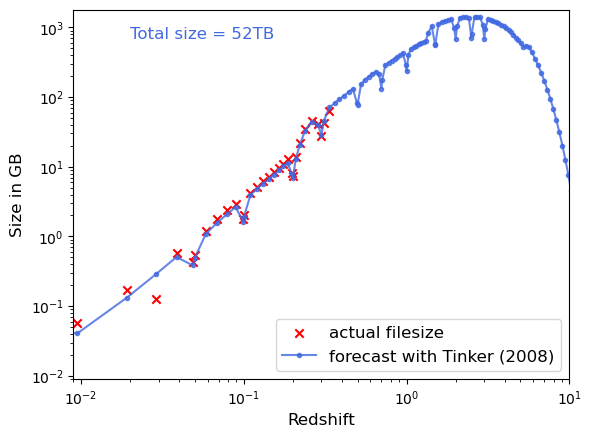

In [40]:
import matplotlib.pyplot as plt
plt.scatter(zdf['z'],zdf['memoryGB'],marker='x',color='red',label='actual filesize')
plt.plot(zdf['z'],s[::-1]/3.5e6,marker='.',label='forecast with Tinker (2008)',color='royalblue',alpha=0.8)
#plt.plot(zdf['z'],size_predict[::-1],color='green',alpha=0.6,linestyle='dashed',label='forecast minimal (21 cols)')
plt.xlim([0.009,10])
plt.ylim([0.009,1800])
plt.yscale('log')
plt.ylabel('Size in GB',fontsize=12)
plt.xlabel('Redshift',fontsize=12)
plt.xscale('log')
plt.legend(loc='lower right',fontsize=12) 
plt.text(0.02,700,'Total size = 52TB',color='royalblue',fontsize=12)
plt.savefig('spacerequirements-flamingo.png')
#plt.text(0.02,400,'Total memory=15TB',color='green',alpha=0.6)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


NameError: name 'c' is not defined

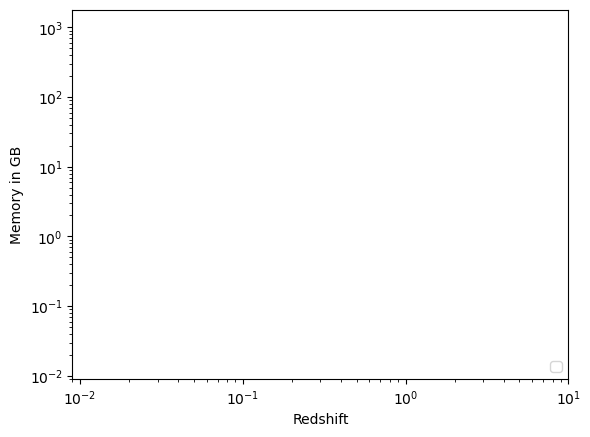

In [126]:
plt.xlim([0.009,10])
plt.ylim([0.009,1800])
plt.yscale('log')
plt.ylabel('Memory in GB')
plt.xlabel('Redshift')
plt.xscale('log')
plt.legend(loc='lower right') 
plt.text(0.02,100,'Total memory=15TB',c)

In [102]:
size_predict.max()

416.99372158553496

In [17]:
df.loc['144']['comovD_Max(Mpc)']

41.826713470251796

In [77]:
zdf.columns

Index(['z', 'memoryGB'], dtype='object')

In [57]:
om

0.304611

In [58]:
ol

0.693922

In [29]:
len(redshift)-1

144